In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pyabf


In [9]:
file = r"G:\My Drive\transfer\2023\2023_04_10_0003.abf"

In [10]:
f = pyabf.ABF(file)


In [11]:
from feature_extractor import SpikeFeatureExtractor, SpikeTrainFeatureExtractor
sfe = SpikeFeatureExtractor(filter=2)
spte = SpikeTrainFeatureExtractor(start=0, end=16000)


{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'adapt': nan, 'latency': 0.6478, 'isi_cv': nan, 'mean_isi': nan, 'median_isi': nan, 'first_isi': nan, 'avg_rate': 6.25e-05}
{'adapt': nan, 'latency': 0.374, 'isi_cv': 0.0, 'mean_isi': 1.0297, 'median_isi': 1.0297, 'first_isi': 1.0297, 'avg_rate': 0.000125}
{'adapt': 0.09365510813553123, 'latency': 0.1922, 'isi_cv': 0.15304006250686164, 'mean_isi': 0.3772333333333333, 'median_isi': 0.3718, 'first_isi': 0.3094, 'avg_rate': 0.00025}
{'adapt': 0.03367162028661162, 'latency': 0.14150000000000001, 'isi_cv': 0.08319675381204847, 'mean_isi': 0.2992, 'median_isi': 0.3063499999999999, 'first_isi': 0.261, 'avg_rate': 0.0003125}
{'adapt': 0.017575630776530002, 'latency': 0.1267, 'isi_cv': 0.08648964351311109, 'mean_isi': 0.26034, 'median_isi': 0.2601, 'first_isi': 0.22590000000000002, 'avg_rate': 0.000375}
{'adapt': 0.1133178088828105, 'latency': 0.1136, 'isi_cv': 0.4000838836105881, 'mean_isi': 0.28180000000000005, 'median_isi': 0.239, 'first_isi':

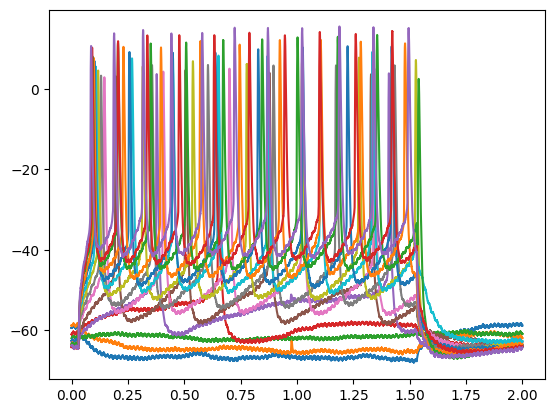

In [14]:
import pandas as pd
for index in f.sweepList:
    f.setSweep(index)
    t = f.sweepX
    v = f.sweepY
    i = f.sweepC

    if f.sweepUnitsY == f.sweepUnitsC:
        v = v/20
    ft = sfe.process(t, v, i)
    ft.to_csv(f'{index}.csv', index=False)
    sptft= spte.process(t=t, v=v, i=i, spikes_df=ft)
    print(sptft)
    print(type(sptft))
    pd.Dataframe(sptft)
    print()
    plt.plot(t, v)

    
